# Import data

In [ ]:
import pandas as pd
import numpy as np
import re
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OLAP + Mining/dataset/raw_data/raw_data.csv')

# Preprocessing

## Entire dataframe

In [ ]:
df['id']=range(len(df))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19203 entries, 0 to 19202
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         19203 non-null  int64  
 1   category           19185 non-null  object 
 2   job_name           19185 non-null  object 
 3   company_name       19185 non-null  object 
 4   job_deadline       19182 non-null  object 
 5   salary             19185 non-null  object 
 6   num_recruits       19185 non-null  object 
 7   working_form       19185 non-null  object 
 8   level              19185 non-null  object 
 9   gender             19185 non-null  object 
 10  exp                19185 non-null  object 
 11  job_address        19184 non-null  object 
 12  job_description    19182 non-null  object 
 13  job_require        19181 non-null  object 
 14  job_benefit        19182 non-null  object 
 15  company_size       19182 non-null  object 
 16  company_address    191

In [ ]:
df.isnull().sum()

Unnamed: 0              0
category               18
job_name               18
company_name           18
job_deadline           21
salary                 18
num_recruits           18
working_form           18
level                  18
gender                 18
exp                    18
job_address            19
job_description        21
job_require            22
job_benefit            21
company_size           21
company_address        22
company_other_job    2926
Latitude              217
Longitude             217
id                      0
dtype: int64

<Axes: >

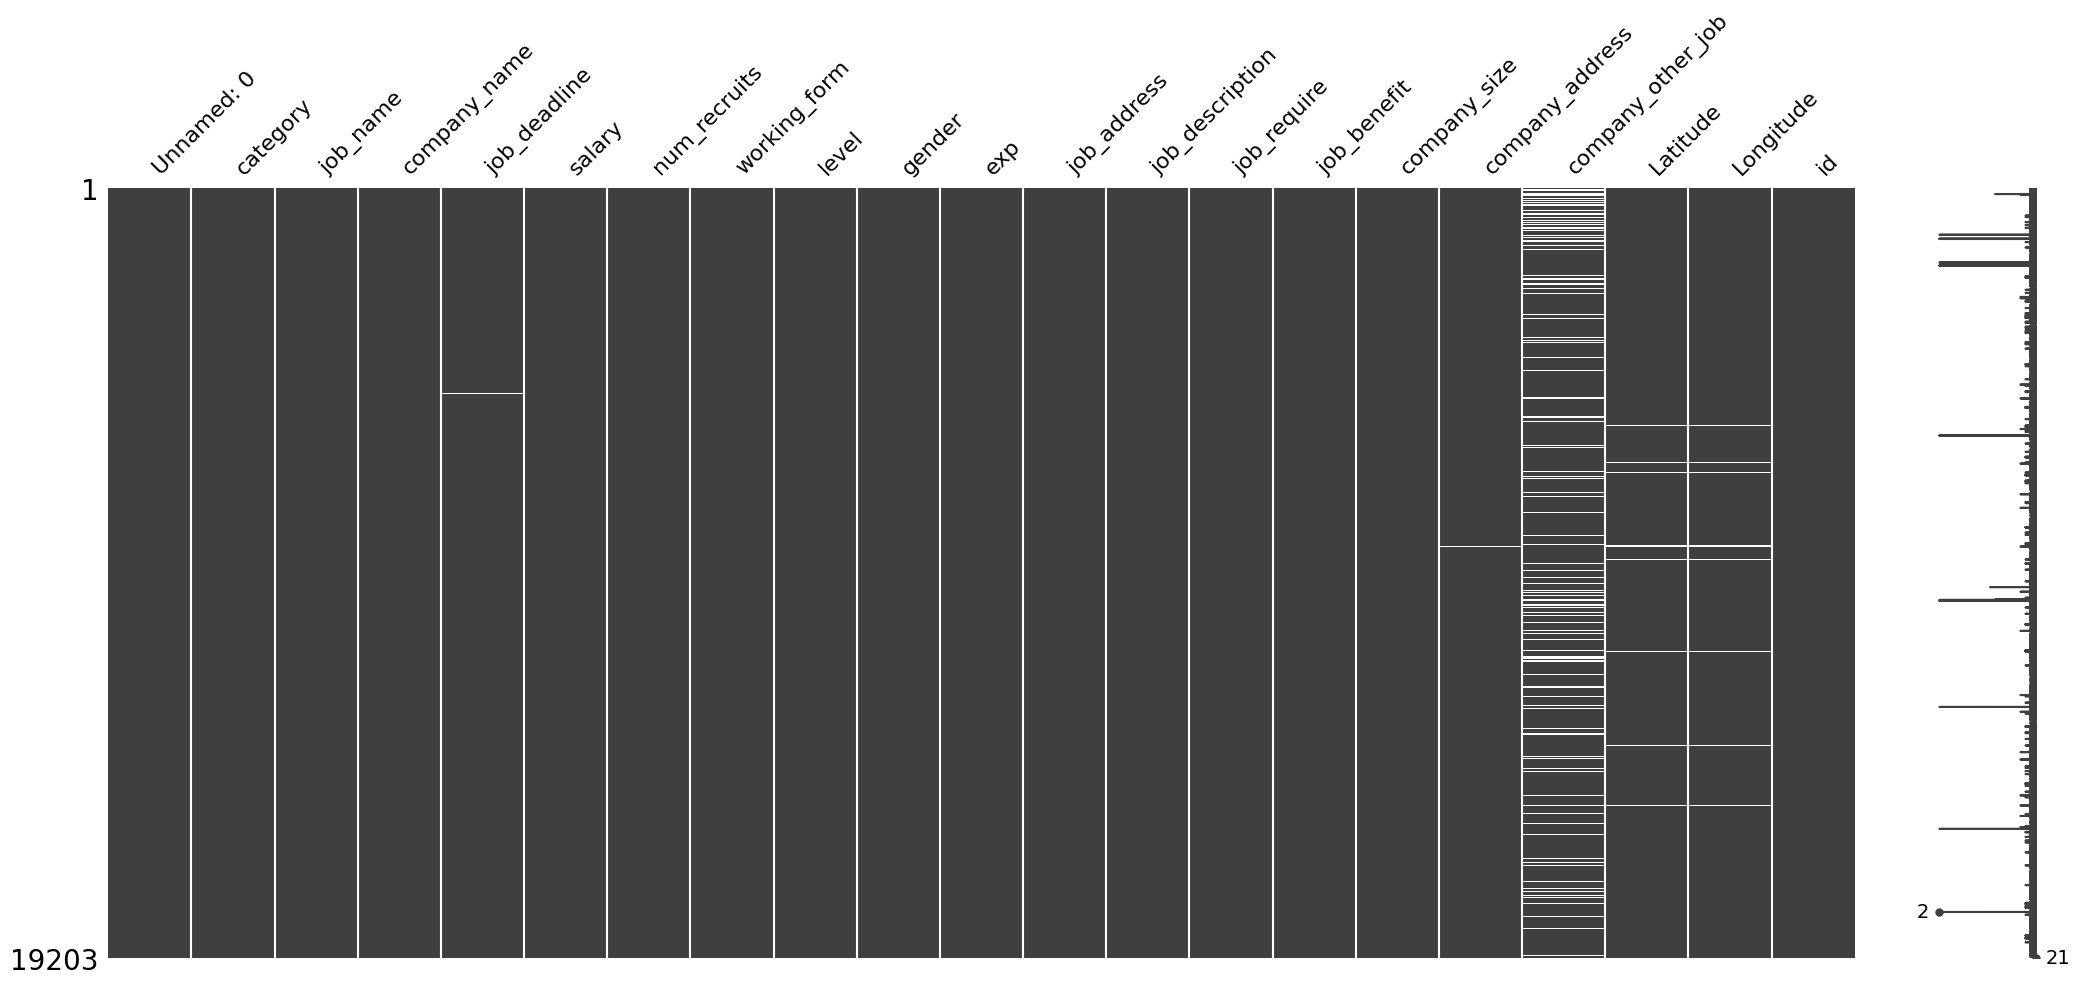

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.dropna(thresh = 3, inplace = True)

Thống kê số lượng null values của toàn bộ bộ dữ liệu, có thể thấy số lượng dữ liệu null ở đa số các dòng là tương tự nhau, từ đó có thể suy ra các dòng này đều có các cột bị rỗng -> xóa những dòng có nhiều hơn 3 giá trị null. Kết quả cho thấy số lượng các cột dữ liệu có giá trị null còn khá ít.

In [ ]:
df.isnull().sum()

Unnamed: 0              0
category                0
job_name                0
company_name            0
job_deadline            3
salary                  0
num_recruits            0
working_form            0
level                   0
gender                  0
exp                     0
job_address             1
job_description         3
job_require             4
job_benefit             3
company_size            3
company_address         4
company_other_job    2908
Latitude              199
Longitude             199
id                      0
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.columns[0:17]

Index(['category', 'job_name', 'company_name', 'job_deadline', 'salary',
       'num_recruits', 'working_form', 'level', 'gender', 'exp', 'job_address',
       'job_description', 'job_require', 'job_benefit', 'company_size',
       'company_address', 'company_other_job'],
      dtype='object')

In [ ]:
for col in df.columns[0:17]:
  df[col] = df[col].str.lower()
  df[col] = df[col].str.replace('\n','')
  df[col] =df[col].str.strip()

## DATAFRAME

In [ ]:
df.head()

,category,job_name,company_name,job_deadline,salary,num_recruits,working_form,level,gender,exp,job_address,job_description,job_require,job_benefit,company_size,company_address,company_other_job,Latitude,Longitude,id
0,tìm việc làm sales representative,chuyên viên phát triển kinh doanh ( sales repr...,homebase management vietnam,hạn nộp hồ sơ: 24/04/2023,thoả thuận,5 người,toàn thời gian,nhân viên,không yêu cầu,không yêu cầu kinh nghiệm,"- hồ chí minh: 15 lê thánh tôn, quận 1",chuyên viên phát triển kinh doanh là một vị tr...,"khả năng bán hàng được thực chứng, khả năng gi...",chúng tôi cũng dành cho ứng viên những quyền l...,25-99 nhân viên,15 lê thánh tôn quận 1 tphcm,",,,,nhân viên kinh doanh,,,,,,,,thoả thuận, ,,...",10.780989,106.705601,0
1,tìm việc làm nhân viên kinh doanh,nhân viên kinh doanh - (chỉ tuyển nam) - lương...,công ty cổ phần đầu tư và công nghệ ninja,hạn nộp hồ sơ: 05/05/2023,10 - 25 triệu,5 người,toàn thời gian,nhân viên,nam,dưới 1 năm,"- hà nội: 62 nguyễn huy tưởng, thanh xuân, hà ...","- tìm kiếm khách hàng, chăm sóc, tư vấn khách ...",- ưu tiên ứng viên ứng tuyển tại hà nội- đam m...,"- lương cơ bản: 6,000,000 - 9,000,000đ + thưởn...",100-499 nhân viên,"tầng 4, tòa nhà mỹ sơn, 62 nguyễn huy tưởng, t...",",,,,nhân viên content seo(lương được thỏa thuậ...",20.998422,105.807108,1
2,tìm việc làm nhân viên kinh doanh,nhân viên kinh doanh - khu vực miền nam - thu ...,công ty cổ phần công nghệ y tế facare quốc tế,hạn nộp hồ sơ: 06/05/2023,trên 20 triệu,6 người,toàn thời gian,nhân viên,nam,2 năm,"- hồ chí minh: 123 đường d1, phước long b, thủ...",• phạm vi làm việc: thành phố hồ chí minh và c...,"- trình độ : cao đẳng, đại học chuyên ngành ki...",- thu nhập: gồm lương cứng 15 triệu + hoa hồng...,25-99 nhân viên,"tòa n01t3 khu ngoại giao đoàn, phường xuân tảo...",",,,,nhân viên bán hàng thiết bị y tế - thu nhậ...",21.063140,105.794796,2
3,tìm việc làm nhân viên tư vấn,nhân viên tư vấn làm việc tại văn phòng,công ty cp câu lạc bộ kỳ nghỉ việt nam,hạn nộp hồ sơ: 08/05/2023,tới 15 triệu,10 người,toàn thời gian,nhân viên,không yêu cầu,không yêu cầu kinh nghiệm,#name?,#name?,#name?,- lương cơ bản: 6-8 triệu/tháng (thỏa thuận th...,100-499 nhân viên,"tầng 4, grandeur palace, 138b giảng võ, ba đìn...",",,,,chuyên viên pháp chế doanh nghiệp,,,,,,,,t...",21.028851,105.825732,3
4,"việc làm tại hà nội, thanh trì, hồ chí minh, q...",nhân viên visual merchandise - nhân viên trưng...,công ty tnhh thời trang h và a,hạn nộp hồ sơ: 31/05/2023,13 - 18 triệu,2 người,toàn thời gian,nhân viên,không yêu cầu,2 năm,"- hà nội: số 9a thanh liệt, thanh trì",lên ý tưởng và thiết kế các mô hình trưng bày ...,tốt nghiệp các trường đào tạo về thời trang. ư...,thu nhập trung bình từ 13.000.000 - 18.000.000...,100-499 nhân viên,"tầng 3, tòa nhà asuva, số 9a ngõ 396 nguyễn xi...",",,,,nhân viên thiết kế thời trang,,,,,,,,15 - ...",20.968621,105.819899,4


## Category

In [ ]:
def cate_type(text):
  if 'tìm việc làm' in text:
    return 'tên việc làm'
  elif 'việc làm tại' in text:
    return 'vị trí việc làm'
  elif 'việc làm it' in text:
    return 'việc làm it'
  else: return "khác"
df['category_type'] = df['category'].apply(lambda text: cate_type(text))
df['category_type'].value_counts()

tên việc làm       12552
vị trí việc làm     4485
việc làm it         2148
Name: category_type, dtype: int64

## Job_name

In [ ]:
def job_name_nor(text):
  x=re.compile(r"^[^\(|-]+")
  x1= x.search(text)[0]
  return x1.strip()

In [ ]:
df['job_name']=df['job_name'].apply(lambda text: job_name_nor(text))

In [ ]:
df['job_name'].value_counts()

nhân viên kinh doanh                                                             657
kế toán tổng hợp                                                                 204
nhân viên chăm sóc khách hàng                                                    169
nhân viên kế toán                                                                137
nhân viên content marketing                                                      122
                                                                                ... 
nhân viên kinh doanh linh kiện điện thoại lương 9                                  1
lập trình viên làm việc online toàn quốc                                           1
nhân viên kinh doanh ngành fmcg mảng đồ uống có cồn thu nhập lên đến 20 triệu      1
nhân viên hỗ trợ hệ thống                                                          1
quản lý cửa hàng nội y                                                             1
Name: job_name, Length: 9510, dtype: int64

## num_recruits

In [ ]:
def rm_outliner(num, num_len):
  num = str(num)
  if len(num)>num_len:
    return 0
  else: return num;

In [ ]:
df['num_recruits'] = df['num_recruits'].apply(lambda text: rm_outliner(text, 10))

In [ ]:
df['num_recruits'] = df['num_recruits'].str.replace('người','').str.strip().astype(float)
df['num_recruits'].value_counts()

1.0      7610
2.0      4831
5.0      2371
3.0      1908
10.0     1208
4.0       437
20.0      230
6.0       161
15.0       90
8.0        82
30.0       62
7.0        48
50.0       38
9.0        24
12.0       22
40.0       14
100.0      14
14.0        5
11.0        4
13.0        2
16.0        2
120.0       2
99.0        2
22.0        2
60.0        1
278.0       1
38.0        1
19.0        1
71.0        1
26.0        1
73.0        1
27.0        1
21.0        1
80.0        1
35.0        1
200.0       1
25.0        1
Name: num_recruits, dtype: int64

## Company name

In [ ]:
def extract_title(name):
  if ('tnhh' in name or 'hữu hạn' in name):
    title = 'công ty tnhh'
    return title
  if ('cp' in name or 'cổ phần' in name):
    title = 'công ty cổ phần'
    return title
  if ('tập đoàn' in name or 'group' in name):
    title = 'tập đoàn'
    return title
  else: title = 'khác'
  return title

In [ ]:
df['company_type'] = df['company_name'].apply(lambda name: extract_title(name))

In [ ]:
df['company_type'].value_counts()

công ty cổ phần    8716
công ty tnhh       7752
khác               2451
tập đoàn            266
Name: company_type, dtype: int64

## Job_deadline

In [ ]:
df['job_deadline'] = df['job_deadline'].str.replace('hạn nộp hồ sơ:','')
df['job_deadline'] = df['job_deadline'].str.replace('/','-')
df['job_deadline'] = df['job_deadline'].str.replace('2050','2023')

In [ ]:
def extract_date(date):
  try:
    x = re.compile(r"([0-9][0-9]-[0-9][0-9]-[[0-9][0-9][0-9][0-9])")
    return x.search(date).group(1)
  except:
    return np.nan

In [ ]:
df['job_deadline'] = df['job_deadline'].apply(lambda date: extract_date(date))

In [ ]:
df['job_deadline'].fillna(df['job_deadline'].mode()[0], inplace = True)

In [ ]:
df['job_deadline'] = pd.to_datetime(df['job_deadline'], dayfirst = True)

In [ ]:
df['job_deadline'].head()

0   2023-04-24
1   2023-05-05
2   2023-05-06
3   2023-05-08
4   2023-05-31
Name: job_deadline, dtype: datetime64[ns]

## EXP

In [ ]:
def exp(text):
  text=str(text)
  if len(text) > 25:
    return 0
  text = text.replace('năm','').strip()
  text = text.replace('không yêu cầu kinh nghiệm','0').strip()
  text = text.replace('dưới 1','0.5').strip()
  text = text.replace('trên 5','6').strip()
  return text

In [ ]:
df['exp'] = df['exp'].apply(lambda text: exp(text))
df['exp'] = df['exp'].astype(float)
df['exp'].value_counts()

1.0    6026
0.0    4400
2.0    3407
0.5    3118
3.0    1511
5.0     329
6.0     212
4.0     182
Name: exp, dtype: int64

## Salary

In [ ]:
df['temp'] = df['salary'].str.replace(",",'', regex=False)
df = df[df['temp'].str.len() <= 30]
df['temp'] = df['temp'].str.replace("(\.\d)",'', regex=True)

<ipython-input-71-e245313457a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['temp'] = df['temp'].str.replace("(\.\d)",'', regex=True)


In [ ]:
def min_salary(text):
  try:
    x=re.compile(r"\d+")
    return x.findall(text)[0]
  except:
    return np.nan
df['min_salary'] = df['temp'].apply(lambda text: min_salary(text))

In [ ]:
def max_salary(text):
  x=re.compile(r"\d+")
  try:
    x1=x.findall(text)[-1]
  except:
    x1= np.nan
  return x1
df['max_salary'] = df['temp'].apply(lambda text: max_salary(text))

In [ ]:
def cal_salary(salary, min, max):
  min = float(min)
  max = float(max)
  if 'usd' in salary:
    return (min+max)/2 * 23000 /1000000
  elif 'triệu' in salary:
    return (min+max)/2
  else:
    return np.nan
df['salary'] = df.apply(lambda row: cal_salary(row["salary"], row["min_salary"], row["max_salary"]),axis=1)

In [ ]:
df[df['salary']<1][['salary','min_salary','max_salary','temp']]

,salary,min_salary,max_salary,temp
2145,0.0000,0,0,tới 0 triệu
2822,0.0000,0,0,tới 0 triệu
3372,0.0000,0,0,trên 0 triệu
4620,0.5000,0,1,0 - 1 triệu
5387,0.0000,0,0,trên 0 triệu
5931,0.0000,0,0,trên 0 triệu
6035,0.5000,0,1,0 - 1 triệu
6490,0.5000,0,1,0 - 1 triệu
6620,0.0000,0,0,trên 0 triệu
6621,0.0000,0,0,tới 0 triệu


In [ ]:
df[df['salary']>1000][['salary','min_salary','max_salary','temp']]

,salary,min_salary,max_salary,temp
12274,138000.0,6000000,6000000,trên 6000000 usd
14410,80500.0,3500000,3500000,tới 3500000 usd
16049,57500.0,2500000,2500000,tới 2500000 usd


In [ ]:
temp = df[df['salary']>100]
temp.to_csv('temp.csv',encoding='utf-8-sig')

In [ ]:
df.drop(df.loc[df['salary']<1].index, inplace=True)
df.drop(df.loc[df['salary']>250].index, inplace=True)

In [ ]:
df.drop(columns=['temp'],inplace=True)
df.dropna(subset=['salary'],inplace=True)
df['salary'].value_counts()

10.000     1212
15.000     1131
20.000      869
8.000       843
9.000       800
           ... 
6.325         1
150.000       1
125.000       1
15.180        1
43.500        1
Name: salary, Length: 155, dtype: int64

## Company_size

In [ ]:
df['max_company_size']=df['company_size'].apply(lambda text: max_salary(text))
df['min_company_size']=df['company_size'].apply(lambda text: min_salary(text))
df['max_company_size'] = df['max_company_size'].astype(float)
df['min_company_size'] = df['min_company_size'].astype(float)

In [ ]:
df['company_size'] = (df['max_company_size'] + df['min_company_size'])/2

In [ ]:
df['company_size'].fillna(df['company_size'].mean(),inplace=True)
df['company_size'].value_counts()

62.000000       4884
299.500000      4678
17.000000       1363
750.000000      1176
1000.000000     1167
5000.000000      337
5.000000         268
10000.000000     240
559.331226       184
2019.000000       25
10.000000         10
2.500000           3
1009.500000        2
1012.500000        2
998.000000         1
2.000000           1
1005.000000        1
Name: company_size, dtype: int64

## Other job

In [ ]:
def count_job(job):
  job=str(job)
  try:
    x = job.count("ứng tuyển")
    return x
  except:
    return np.nan

In [ ]:
df['num_other_job'] = df['company_other_job'].apply(lambda job: count_job(job))

In [ ]:
df['num_other_job'].fillna(value=0, inplace = True)

In [ ]:
df['num_other_job'].value_counts()

5    3863
0    2254
2    2215
1    2208
6    2204
3     887
4     711
Name: num_other_job, dtype: int64

In [ ]:
df['company_other_job'].fillna('không', inplace = True)

## Job_require

In [ ]:
def extract_degree(text):
  text=str(text)
  if 'trung học phổ thông' in text or 'thpt' in text:
    return "thpt"
  elif 'trung cấp' in text:
    return 'trung cấp'
  elif 'cao đẳng' in text or 'cd' in text:
    return 'cao đẳng'
  elif 'đại học' in text or 'đh' in text or 'bachelor':
    return 'đại học'
  else:
    return 'không yêu cầu'
df['degree']=df['job_require'].apply(lambda text: extract_degree(text))
df['degree'].value_counts()

đại học      9375
cao đẳng     3141
trung cấp    1534
thpt          292
Name: degree, dtype: int64

In [ ]:
def extract_language(text):
  text=str(text)
  if 'tiếng anh' in text or 'english' in text or 'ngôn ngữ anh' in text:
    return 'tiếng anh'
  elif 'tiếng' in text or 'ngôn ngữ' in text:
    return 'ngôn ngữ khác'
  else:
    return 'không yêu cầu'
df['language'] = df['job_require'].apply(lambda text: extract_language(text))
df['language'].value_counts()

không yêu cầu    11069
tiếng anh         2720
ngôn ngữ khác      553
Name: language, dtype: int64

In [ ]:
def extract_BH(text):
  text=str(text)
  if 'bh' in text or 'bảo hiểm' in text:
    return 1
  else:
    return 0
df['BH'] = df['job_benefit'].apply(lambda text: extract_BH(text))
df['BH'].value_counts()

1    10603
0     3739
Name: BH, dtype: int64

## Location

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.rename(columns={'company_address':'job_address','job_address':'company_address'}, inplace=True)

In [ ]:
df_coordinates=pd.read_csv('/content/drive/MyDrive/OLAP + Mining/dataset/clean_data/df_coordinates.csv')
df=df.merge(df_coordinates, how="inner",on=['Latitude','Longitude'])

In [ ]:
df['json_address'].head()

0    {'building': 'PVV-Vinapharm', 'house_number': ...
1    {'building': 'PVV-Vinapharm', 'house_number': ...
2    {'building': 'N01-T3', 'road': 'Đường Hoàng Mi...
3    {'building': 'N01-T3', 'road': 'Đường Hoàng Mi...
4    {'building': 'N01-T3', 'road': 'Đường Hoàng Mi...
Name: json_address, dtype: object

In [ ]:
def extract_city(address):
  address=str(address)
  city=re.compile(r"(Thành phố .*?)'")
  try:
    x= city.search(address).group(1)
  except:
    x=''
  if x == '':
    city=re.compile(r"(Tỉnh .*?)'")
  try:
    x= city.search(address).group(1)
  except:
    x=''
  if x=='':
    city=re.compile(r"'city': '(.*?)'")
  try:
    x=city.search(address).group(1)
  except:
    x=''
  if x=='':
    city=re.compile(r"'state': '(.*?)'")
  try:
    x=city.search(address).group(1)
  except:
    x=''
  return x


In [ ]:
df['city'] = df['json_address'].apply(lambda address: extract_city(address))

In [ ]:
df['city'].head()

0    Thành phố Hà Nội
1    Thành phố Hà Nội
2    Thành phố Hà Nội
3    Thành phố Hà Nội
4    Thành phố Hà Nội
Name: city, dtype: object

In [ ]:
def extract_district(address):
  address=str(address)
  district=re.compile(r"(Quận .*?)'")
  try:
    x= district.search(address).group(1)
  except:
    x=''
  if x=='':
    district=re.compile(r"(Huyện .*?)'")
  try:
    x=district.search(address).group(1)
  except:
    x=''
  if x=='':
    district=re.compile(r"'county': '(.*?)'")
  try:
    x=district.search(address).group(1)
  except:
    x=''
  if x=='':
    district=re.compile(r"'city_district': '(.*?)'")
  try:
    x=district.search(address).group(1)
  except:
    x=''
  return x

In [ ]:
df['district'] = df['json_address'].apply(lambda address: extract_district(address))

In [ ]:
df['district'].head()

0     Quận Thanh Xuân
1     Quận Thanh Xuân
2    Quận Bắc Từ Liêm
3    Quận Bắc Từ Liêm
4    Quận Bắc Từ Liêm
Name: district, dtype: object

In [ ]:
def extract_suburb(address):
  address=str(address)
  district=re.compile(r"(Phường .*?)'")
  try:
    x= district.search(address).group(1)
  except:
    x=''
  if x=='':
    district=re.compile(r"(Xã .*?)'")
  try:
    x=district.search(address).group(1)
  except:
    x=''
  if x=='':
    district=re.compile(r"'suburb': '(.*?)'")
  try:
    x=district.search(address).group(1)
  except:
    x=''
  return x

In [ ]:
df['suburb'] = df['json_address'].apply(lambda address: extract_suburb(address))

In [ ]:
df['suburb'] = df['suburb'].str.replace("Quận ",'')

In [ ]:
df['suburb'].head()

0         Thanh Xuân
1         Thanh Xuân
2    Phường Xuân Tảo
3    Phường Xuân Tảo
4    Phường Xuân Tảo
Name: suburb, dtype: object

In [ ]:
df.replace('',np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14067 entries, 0 to 14066
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category           14067 non-null  object        
 1   job_name           14067 non-null  object        
 2   company_name       14067 non-null  object        
 3   job_deadline       14067 non-null  datetime64[ns]
 4   salary             14067 non-null  float64       
 5   num_recruits       14067 non-null  float64       
 6   working_form       14067 non-null  object        
 7   level              14067 non-null  object        
 8   gender             14067 non-null  object        
 9   exp                14067 non-null  float64       
 10  company_address    14067 non-null  object        
 11  job_description    14067 non-null  object        
 12  job_require        14067 non-null  object        
 13  job_benefit        14067 non-null  object        
 14  compan

In [ ]:
df.drop(columns = {'job_description','job_require','job_benefit','company_other_job','job_address'}, inplace = True)
df.rename(columns={'json_address':'job_address'},inplace=True)

## Remove Error/Outlier

In [ ]:
df['job_id'] = range(len(df))

In [ ]:
df.drop(columns={'count'},inplace=True)

In [ ]:
df = df.reindex(columns=['category','category_type'
                         ,'job_address','Longitude','Latitude','city','district','suburb'
                         ,'job_id','job_name','working_form','level','gender','exp','degree','language','BH'
                         ,'id','num_other_job','salary','min_salary','max_salary','num_recruits'
                         ,'company_name','company_type','company_address','company_size','max_company_size','min_company_size'
                         ,'job_deadline'])

In [ ]:
df.to_csv('/content/drive/MyDrive/Project/TopCV Job Salary/tidy_data.csv',index=False)